# Project: Communicate data findings using Bay Wheels's trip data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#exploration">Data Exploration and Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Goal**: as a part of <a href=https://www.udacity.com/course/data-analyst-nanodegree--nd002>Udacity's</a> Data Analyst Nanodegree Program, you need to convey findings from the dataset through transforming exploratory visualizations into polished, explanatory visualizations.

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. In the first part, you will use Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables. In the second part, you will produce a short presentation that illustrates interesting properties, trends, and relationships that you discovered in your selected dataset.

### Data
<a href=https://www.lyft.com/bikes/bay-wheels>Bay Wheels</a> (previously known as Ford GoBike) is a regional public bike sharing system in San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of Bay Wheels's trip data for public use for February 2020, which you can find <a href=https://www.lyft.com/bikes/bay-wheels/system-data>here</a>.

<a id='gathering'></a>
## Data Gathering

In [88]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
df_trip = pd.read_csv('202002-baywheels-tripdata.csv')
df_trip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


In [12]:
df.shape

(432354, 14)

In [13]:
# Getting information on the trip dataset
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
duration_sec               432354 non-null int64
start_time                 432354 non-null object
end_time                   432354 non-null object
start_station_id           161723 non-null float64
start_station_name         161723 non-null object
start_station_latitude     432354 non-null float64
start_station_longitude    432354 non-null float64
end_station_id             162194 non-null float64
end_station_name           162194 non-null object
end_station_latitude       432354 non-null float64
end_station_longitude      432354 non-null float64
bike_id                    432354 non-null int64
user_type                  432354 non-null object
rental_access_method       317843 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 46.2+ MB


There are some data quality issues such as
* start_time and end_time columns are in string format instead of datetime format
* start_station_id, end_station_id are in float format instead of integer format
* user_type is in string format. Can be transformed into categorical variable
* NULL values in start_station_id, start_station_name, end_station_id, end_station_name and rental_access_method columns

In [15]:
# Looking at the number of NULL values
df_trip.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           270631
start_station_name         270631
start_station_latitude          0
start_station_longitude         0
end_station_id             270160
end_station_name           270160
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       114511
dtype: int64

In [16]:
# Check for duplicated values
df_trip.duplicated().sum()

0

In [17]:
# Looking at different user types
df_trip.user_type.value_counts()

Subscriber    277446
Customer      154908
Name: user_type, dtype: int64

In [20]:
# Looking at different rental access methods
df_trip.rental_access_method.value_counts()

app        293205
clipper     24638
Name: rental_access_method, dtype: int64

<a id='cleaning'></a>
## Data Cleaning

It was found that there are some data quality **issues** such as 
* start_time and end_time columns are in string format instead of datetime format
* start_station_id, end_station_id are in float format instead of integer format
* user_type is in string format. Can be transformed into categorical variable
* NULL values in start_station_id, start_station_name, end_station_id, end_station_name and rental_access_method columns

To improve the **quality** of data and conduct further data analysis, it was decided to
* convert data formats into correct one
* delete rows with NULL values

As for data **tidiness**, the following transformations will be made:
* add new columns for trip duration in minutes, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

In [21]:
# Let's have a copy of the dataset
trip_clean = df_trip.copy()

### Data Quality

**Issue #1**

**Define:** Delete rows with NULL values in start_station_id, start_station_name, end_station_id, end_station_name and rental_access_method columns

In [22]:
# Code
trip_clean.drop(trip_clean[trip_clean.start_station_id.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.start_station_name.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.end_station_id.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.end_station_name.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.rental_access_method.isnull()].index, inplace = True)

In [24]:
# Test 1
trip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14516 entries, 115429 to 424153
Data columns (total 14 columns):
duration_sec               14516 non-null int64
start_time                 14516 non-null object
end_time                   14516 non-null object
start_station_id           14516 non-null float64
start_station_name         14516 non-null object
start_station_latitude     14516 non-null float64
start_station_longitude    14516 non-null float64
end_station_id             14516 non-null float64
end_station_name           14516 non-null object
end_station_latitude       14516 non-null float64
end_station_longitude      14516 non-null float64
bike_id                    14516 non-null int64
user_type                  14516 non-null object
rental_access_method       14516 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 1.7+ MB


In [25]:
# Test 2
trip_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
rental_access_method       0
dtype: int64

**Issue #2**

**Define:** convert data formats for start_time, end_time, start_station_id, end_station_id, user_type columns  into correct one

In [26]:
# Code
trip_clean['start_time'] = pd.to_datetime(trip_clean['start_time'])
trip_clean['end_time'] = pd.to_datetime(trip_clean['end_time'])

trip_clean['start_station_id'] = trip_clean['start_station_id'].astype('int')
trip_clean['end_station_id'] = trip_clean['end_station_id'].astype('int')

trip_clean['user_type'] = trip_clean['user_type'].astype('category')

In [27]:
# Test
trip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14516 entries, 115429 to 424153
Data columns (total 14 columns):
duration_sec               14516 non-null int64
start_time                 14516 non-null datetime64[ns]
end_time                   14516 non-null datetime64[ns]
start_station_id           14516 non-null int64
start_station_name         14516 non-null object
start_station_latitude     14516 non-null float64
start_station_longitude    14516 non-null float64
end_station_id             14516 non-null int64
end_station_name           14516 non-null object
end_station_latitude       14516 non-null float64
end_station_longitude      14516 non-null float64
bike_id                    14516 non-null int64
user_type                  14516 non-null category
rental_access_method       14516 non-null object
dtypes: category(1), datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 1.6+ MB


### Data Tidiness

**Issue #1**

**Define:** add new columns for trip duration in minutes, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

In [30]:
# Code
trip_clean['duration_min'] = trip_clean['duration_sec']/60

trip_clean['start_date'] = trip_clean.start_time.dt.strftime('%Y-%m-%d')
trip_clean['start_hour_of_day'] = trip_clean.start_time.dt.strftime('%H')
trip_clean['start_day_of_week'] = trip_clean.start_time.dt.strftime('%A')
trip_clean['start_month'] = trip_clean.start_time.dt.strftime('%B')

In [31]:
# Test
trip_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,rental_access_method,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,duration_min,start_hour_of_day,start_day_of_week
115429,298,2020-02-01 20:14:08,2020-02-01 20:19:06,473,Willow St at Blewett Ave,37.309014,-121.900011,415,Delmas Ave at Virginia St,37.319757,...,Subscriber,app,4.966667,2020-02-01,20,Saturday,February,4.966667,20,Saturday
115434,393,2020-02-03 18:33:39,2020-02-03 18:40:12,473,Willow St at Blewett Ave,37.309014,-121.900011,415,Delmas Ave at Virginia St,37.319757,...,Subscriber,app,6.550000,2020-02-03,18,Monday,February,6.550000,18,Monday
115437,284,2020-02-16 19:45:10,2020-02-16 19:49:54,473,Willow St at Blewett Ave,37.309014,-121.900011,415,Delmas Ave at Virginia St,37.319757,...,Subscriber,app,4.733333,2020-02-16,19,Sunday,February,4.733333,19,Sunday
115438,296,2020-02-08 20:40:25,2020-02-08 20:45:22,473,Willow St at Blewett Ave,37.309014,-121.900011,415,Delmas Ave at Virginia St,37.319757,...,Subscriber,app,4.933333,2020-02-08,20,Saturday,February,4.933333,20,Saturday
115633,799,2020-02-04 11:43:38,2020-02-04 11:56:57,425,Bird Ave at Willow St,37.311284,-121.896325,425,Bird Ave at Willow St,37.311284,...,Customer,app,13.316667,2020-02-04,11,Tuesday,February,13.316667,11,Tuesday


### Save cleaned dataset

In [32]:
#Saving data to csv
trip_master = trip_clean
trip_master.to_csv('baywheels_tripdata_clean.csv')

<a id='exploration'></a>
## Data Exploration and Analysis

In this section, I used Python visualization libraries to systematically explore trip_master dataset, starting from plots of single variables and building up to plots of multiple variables. Also, some research questions were developed, which will be answered in the Data Analysis section.

### Univariate Exploration

In [37]:
# Having a look at the obtained dataset
trip_master.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,rental_access_method,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,duration_min,start_hour_of_day,start_day_of_week
222228,69,2020-02-06 20:30:36,2020-02-06 20:31:45,86,Market St at Dolores St,37.769305,-122.426826,86,Market St at Dolores St,37.769305,...,Subscriber,app,1.150000,2020-02-06,20,Thursday,February,1.150000,20,Thursday
323185,616,2020-02-07 12:29:29,2020-02-07 12:39:46,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,285,Webster St at O'Farrell St,37.783521,...,Subscriber,app,10.266667,2020-02-07,12,Friday,February,10.266667,12,Friday
285773,1666,2020-02-14 10:58:25,2020-02-14 11:26:12,52,McAllister St at Baker St,37.777416,-122.441838,467,Brannan St at Colin P Kelly Jr St,37.782386,...,Subscriber,app,27.766667,2020-02-14,10,Friday,February,27.766667,10,Friday
353923,537,2020-02-17 11:03:29,2020-02-17 11:12:26,324,Union Square (Powell St at Post St),37.788300,-122.408531,77,11th St at Natoma St,37.773507,...,Subscriber,app,8.950000,2020-02-17,11,Monday,February,8.950000,11,Monday
154938,1303,2020-02-28 20:20:39,2020-02-28 20:42:23,134,Valencia St at 24th St,37.752428,-122.420628,285,Webster St at O'Farrell St,37.783521,...,Subscriber,app,21.716667,2020-02-28,20,Friday,February,21.716667,20,Friday


What is the distribution of the number of trips by the start hour of a day?

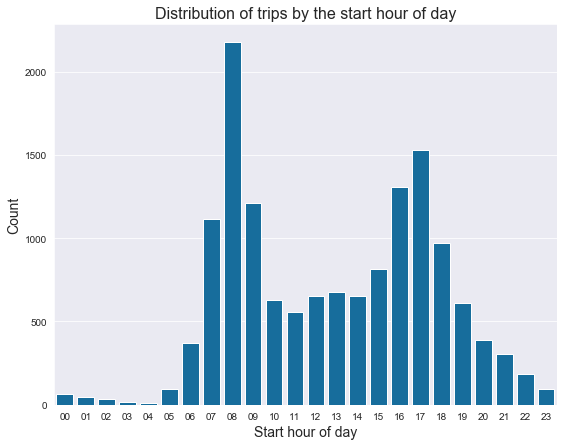

In [83]:
# Visualizing distribution of trips by hours

plt.rcParams['figure.figsize'] = 9, 7
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=trip_master, x='start_hour_of_day', color=base_color)
plt.xlabel('Start hour of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start hour of day", fontsize=16);

The most busy hour is 8 AM, which can be associated with a need to go to work and start of human activities. 
Other picks to look at: 7 AM - 9 AM and 4 PM - 6 PM.

What is the distribution of the number of trips by a day in a week?

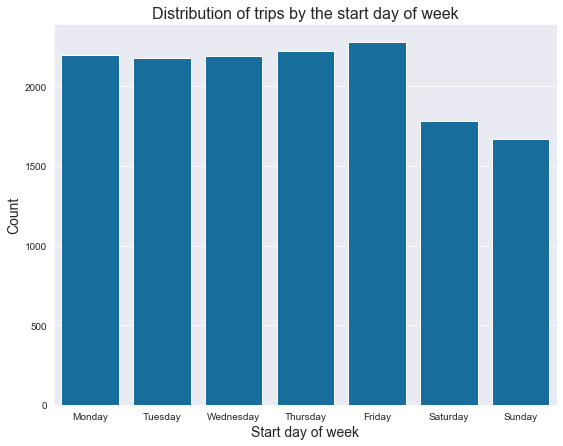

In [82]:
# Visualizing distribution of trips by days

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trip_master['start_day_of_week'] = trip_master['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=trip_master, x='start_day_of_week', color=base_color)
plt.xlabel('Start day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);

On Saturday and Sunday people tend to use the bike service less.

What is the proportion between different user types?

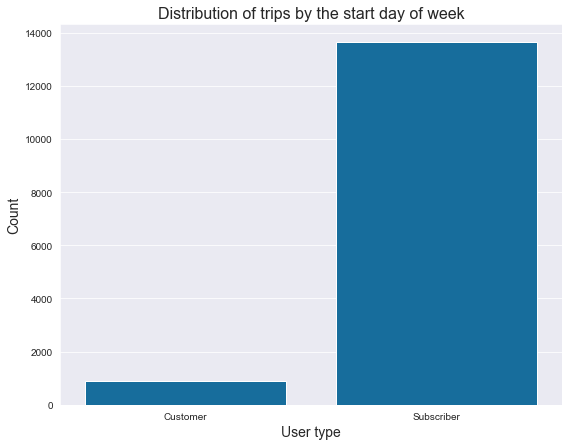

In [81]:
# Let's have a look at the number of users by user type

sb.countplot(data=trip_master, x='user_type', color=base_color)
plt.xlabel('User type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);

It is clear that the majority of users is subscribers.

What is the distribution between the rental access methods?

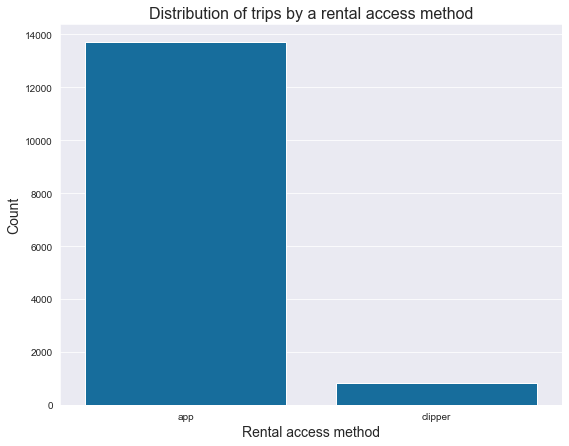

In [80]:
# Let's have a look at the number of trips by rental access method

sb.countplot(data=trip_master, x='rental_access_method', color=base_color)
plt.xlabel('Rental access method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by a rental access method", fontsize=16);

It is interesting, that the majority of trips was accessed by the app rather than a clipper

How much time users spend in a trip?

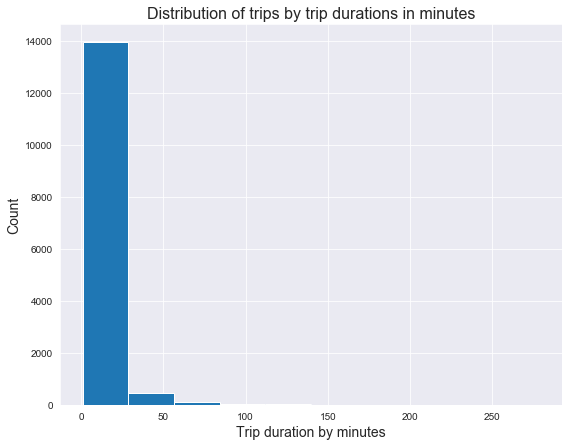

In [79]:
# Let's have a look at distribution of trips duration by minutes

plt.hist(data=trip_master, x='duration_minute')
plt.xlabel('Trip duration by minutes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by trip durations in minutes", fontsize=16);

Let's assign appropriate bin size to get a better idea on the data

In [55]:
trip_master['duration_min'].describe(percentiles=[.99])

count    14516.000000
mean        11.572233
std         11.666318
min          1.000000
50%          9.083333
99%         58.465833
max        278.733333
Name: duration_min, dtype: float64

In [58]:
trip_master['duration_min'].describe()

count    14516.000000
mean        11.572233
std         11.666318
min          1.000000
25%          5.850000
50%          9.083333
75%         13.800000
max        278.733333
Name: duration_min, dtype: float64

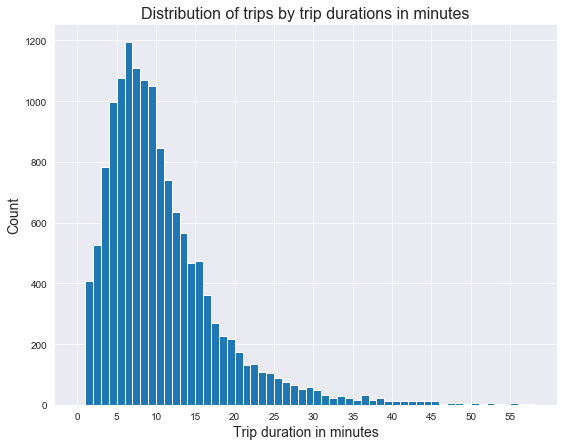

In [78]:
# Revisualizing distribution of trips duration by minutes

bins = np.arange(0, 59, 1)
ticks = np.arange(0, 59, 5)
plt.hist(data=trip_master, x='duration_min', bins=bins)
plt.xticks(ticks, ticks)
plt.xlabel('Trip duration in minutes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by trip durations in minutes", fontsize=16);

We got a right skewed distribution of the number of trips by minutes. From the graph we can say that the mean value is larger than the median for this dataset. Also, we can say that about 50% of trips have a duration between 6 to 14 mins. On the other hand, it is interesting to get to know about the outliers (duration of a trip > 59 mins). Maybe there are some problems associated with the trip or a user need to use the bike for long distances. 
Overall, people tend to rent a bike for less than an hour.

How many outliers we have for the trip duration?

In [61]:
# Let's have a look at the outliers

trip_outliers = trip_master.query('duration_min >= 59')
trip_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 116951 to 424081
Data columns (total 22 columns):
duration_sec               143 non-null int64
start_time                 143 non-null datetime64[ns]
end_time                   143 non-null datetime64[ns]
start_station_id           143 non-null int64
start_station_name         143 non-null object
start_station_latitude     143 non-null float64
start_station_longitude    143 non-null float64
end_station_id             143 non-null int64
end_station_name           143 non-null object
end_station_latitude       143 non-null float64
end_station_longitude      143 non-null float64
bike_id                    143 non-null int64
user_type                  143 non-null category
rental_access_method       143 non-null object
duration_minute            143 non-null float64
start_date                 143 non-null object
start_hourofday            143 non-null object
start_dayofweek            143 non-null object
start_month           

We have 143 outliers in terms of duration of a trip

In [66]:
trip_outliers.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,rental_access_method,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,duration_min,start_hour_of_day,start_day_of_week
418641,7002,2020-02-15 09:14:40,2020-02-15 11:11:22,399,Bay St at Fillmore St,37.802636,-122.436289,399,Bay St at Fillmore St,37.802636,...,Subscriber,app,116.700000,2020-02-15,09,Saturday,February,116.700000,09,Saturday
282918,4791,2020-02-11 10:35:25,2020-02-11 11:55:17,55,Webster St at Grove St,37.777053,-122.429558,489,Funston Ave at Clement St,37.782498,...,Customer,app,79.850000,2020-02-11,10,Tuesday,February,79.850000,10,Tuesday
303793,3702,2020-03-01 15:22:52,2020-03-01 16:24:35,511,Anza St at Collins St,37.780680,-122.450012,511,Anza St at Collins St,37.780680,...,Customer,app,61.700000,2020-03-01,15,Sunday,March,61.700000,15,Sunday
265767,4414,2020-02-08 14:39:12,2020-02-08 15:52:46,53,Grove St at Divisadero,37.775946,-122.437777,52,McAllister St at Baker St,37.777416,...,Subscriber,app,73.566667,2020-02-08,14,Saturday,February,73.566667,14,Saturday
396796,4295,2020-02-13 12:36:03,2020-02-13 13:47:39,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,441,Chestnut St at Van Ness Ave,37.802288,...,Subscriber,app,71.583333,2020-02-13,12,Thursday,February,71.583333,12,Thursday
332807,10167,2020-02-25 18:28:45,2020-02-25 21:18:13,368,Myrtle St at Polk St,37.785434,-122.419622,3,Powell St BART Station (Market St at 4th St),37.786375,...,Subscriber,app,169.450000,2020-02-25,18,Tuesday,February,169.450000,18,Tuesday
338875,5590,2020-02-25 14:57:52,2020-02-25 16:31:02,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,63,Bryant St at 6th St,37.775910,...,Customer,app,93.166667,2020-02-25,14,Tuesday,February,93.166667,14,Tuesday
423368,7394,2020-02-15 16:03:32,2020-02-15 18:06:47,462,Cruise Terminal at Pier 27,37.804648,-122.402087,478,Greenwich St at Franklin St,37.800254,...,Customer,app,123.233333,2020-02-15,16,Saturday,February,123.233333,16,Saturday
418701,4769,2020-02-08 13:08:56,2020-02-08 14:28:26,399,Bay St at Fillmore St,37.802636,-122.436289,399,Bay St at Fillmore St,37.802636,...,Customer,app,79.483333,2020-02-08,13,Saturday,February,79.483333,13,Saturday
412040,4418,2020-02-01 15:28:10,2020-02-01 16:41:48,478,Greenwich St at Franklin St,37.800254,-122.425919,478,Greenwich St at Franklin St,37.800254,...,Customer,app,73.633333,2020-02-01,15,Saturday,February,73.633333,15,Saturday


When did the outlier cases happened? 

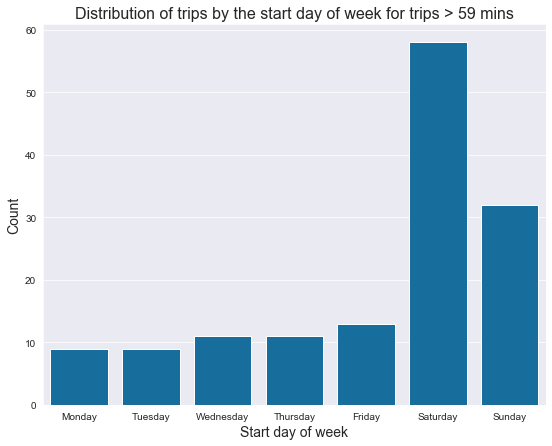

In [76]:
# Visualizing distribution of trips by a day of week for the dataset with outliers

sb.countplot(data=trip_outliers, x='start_day_of_week', color=base_color)
plt.xlabel('Start day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week for trips > 59 mins", fontsize=16);

It is interesting that longer periods of use associated with weekends.

At what time do we get the outlier cases?

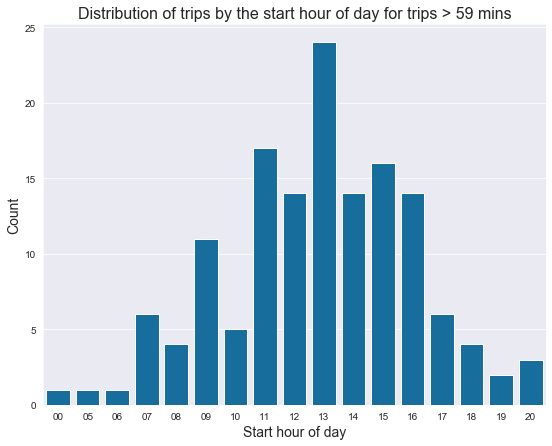

In [75]:
# Visualizing distribution of trips by hours for the dataset with outliers

plt.rcParams['figure.figsize'] = 9, 7
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=trip_outliers, x='start_hour_of_day', color=base_color)
plt.xlabel('Start hour of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start hour of day for trips > 59 mins", fontsize=16);

It is clear that longer trips (>59 mins) will be more likely from 11 AM to 16 PM.

### Insights from univariate data exploration

* The most busy hour is 8 AM, which can be associated with a need to go to work and start of human activities.  Other picks to look at: 7 AM - 9 AM and 4 PM - 6 PM
* On Saturdays and Sundays people tend to use the bike service less
* It is clear that the majority of users is subscribers
* It is interesting, that the majority of trips was accessed by the app rather than a clipper
* About 50% of trips have a duration between 6 to 14 mins
* Overall, people tend to rent a bike for less than an hour
* Longer periods of use (> 59 mins) are associated with weekends
* Longer trips (>59 mins) will be more likely from 11 AM to 16 PM.

### Bivariate Exploration

How much time do each user group tend to spend in a trip? Is there any difference?

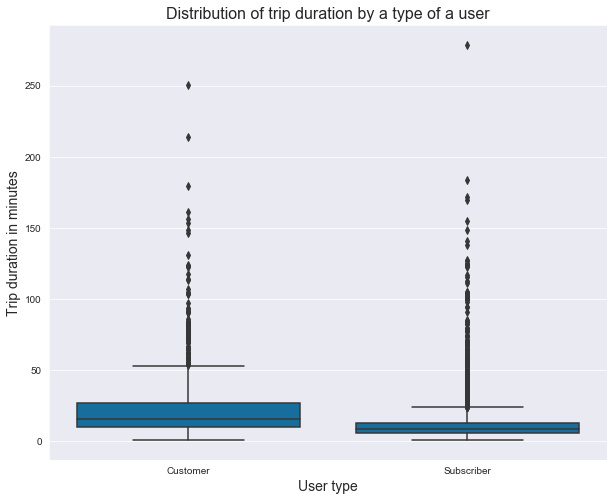

In [74]:
# Let's have a look at how duration of a trip varies between different users

plt.rcParams['figure.figsize'] = 10, 8
sb.boxplot(data=trip_master, x='user_type', y='duration_min', color=base_color);
plt.xlabel('User type', fontsize=14)
plt.ylabel('Trip duration in minutes', fontsize=14)
plt.title("Distribution of trip duration by a type of a user", fontsize=16);

Customers tend to use the service longer than subscribers. However, due to a disproportion between customers and subscribers in the dataset (subscribers is the majority), we may get incorrect view on the situation. It is better to gather data for a longer period of time to have a better understanding.

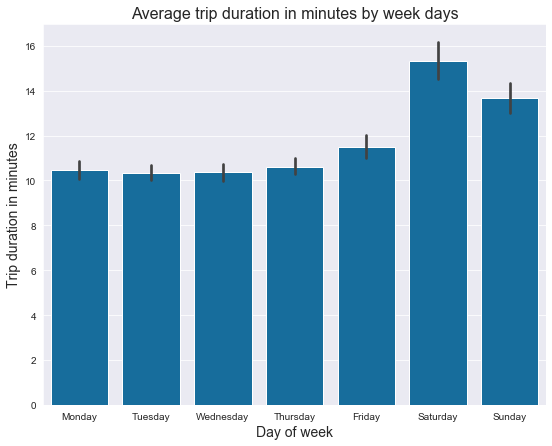

In [86]:
# Trip duration by week days

sb.barplot(data=trip_master, x='start_day_of_week', y='duration_min', color=base_color)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Trip duration in minutes', fontsize=14)
plt.title("Average trip duration in minutes by week days", fontsize=16);

Looking at the user types, is there any difference in daily usage?

People tend to cycle longer during weekends, which is consistent with the data on outliers (trips >59 mins)

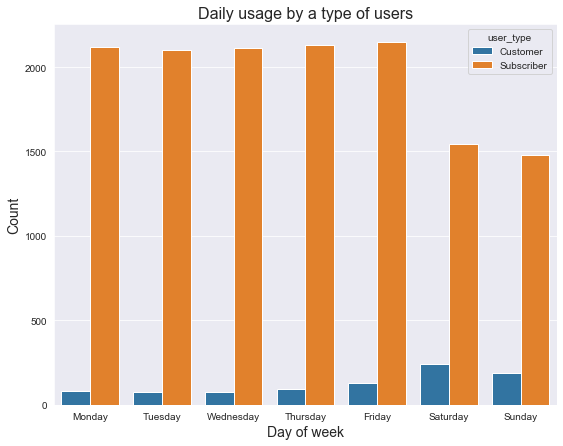

In [90]:
# Daily usage by a user type

plt.rcParams['figure.figsize'] = 9, 7
sb.countplot(data=trip_master, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Daily usage by a type of users", fontsize=16);

Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday

Is there any difference in hourly usage between type of users?

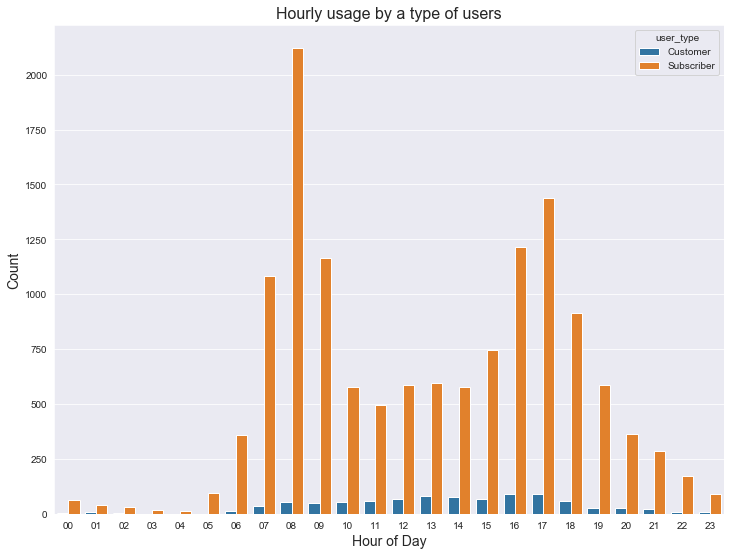

In [92]:
# Hourly usage by a user type

plt.rcParams['figure.figsize'] = 12, 9
sb.countplot(data=trip_master, x='start_hour_of_day', hue='user_type');
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Hourly usage by a type of users", fontsize=16);

Both customers and subscribers have similar pattern of using a bicycle. This graph proves that customers and subscribers tend to use a bicycle more at rush hours. However, due to a luck of data on customers' usage, there is maybe some headen trends/insights.

Is there any difference in daily usage between the access types?

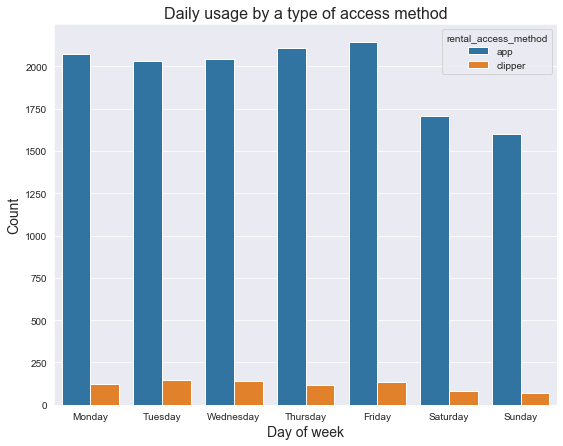

In [95]:
# Daily usage by an access type

plt.rcParams['figure.figsize'] = 9, 7
sb.countplot(data=trip_master, x='start_day_of_week', hue='rental_access_method');
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Daily usage by a type of access method", fontsize=16);

There is a similar pattern in access method by a day of a week for each access method, where weekend looks less busy.

Is there any difference in hourly usage between the access types?

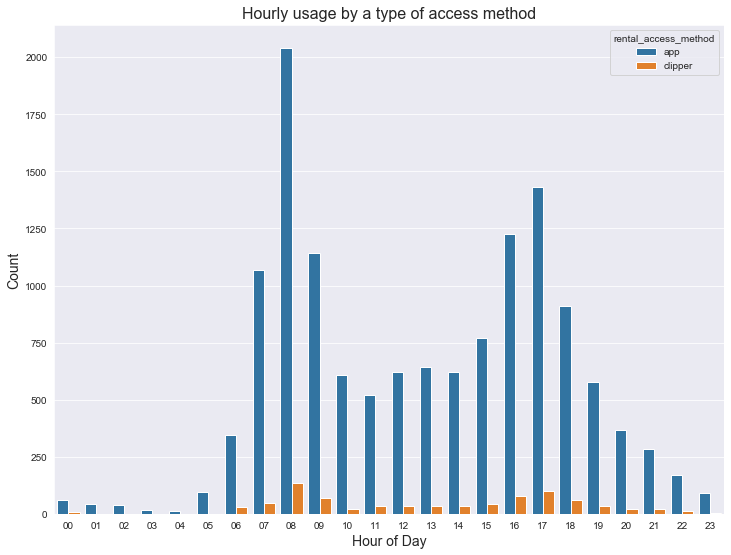

In [100]:
# Hourly usage by a user type

plt.rcParams['figure.figsize'] = 12, 9
sb.countplot(data=trip_master, x='start_hour_of_day', hue='rental_access_method');
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Hourly usage by a type of access method", fontsize=16);

There is no difference in a hourly data usage by app and clipper access methods

### Insights from bivariate data exploration

* Customers tend to use the service longer than subscribers. However, due to a disproportion between customers and subscribers in the dataset (subscribers is the majority), we may get incorrect view on the situation. It is better to gather data for a longer period of time to have a better understanding
* People tend to cycle longer during weekends, which is consistent with the data on outliers (trips >59 mins)
* Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday
* Both customers and subscribers have similar pattern of using a bicycle. This graph proves that customers and subscribers tend to use a bicycle more at rush hours. However, due to a luck of data on customers' usage, there is maybe some headen trends/insights
* There is a similar pattern in access method by a day of a week for each access method, where weekend looks less busy
* There is no difference in a hourly data usage by app and clipper access methods

### Research questions

Based on the previous data exploration, I got the following reserch questions:
* How does the average trip duration vary during a week between customers and subscribers?
* How does the average trip duration vary during a week between different access methods?
* How does the hourly usage vary during a week for customers and subscribers?
* How does the hourly usage vary during a week for app and cleaper access methods?

Overall, I am curious about how the data changes by hours and weekdays for different user types and different access methods.

### Multivariate Exploration

In this part I tried to answer my research questions.

**Q1: How does the average trip duration vary during a week between customers and subscribers?**

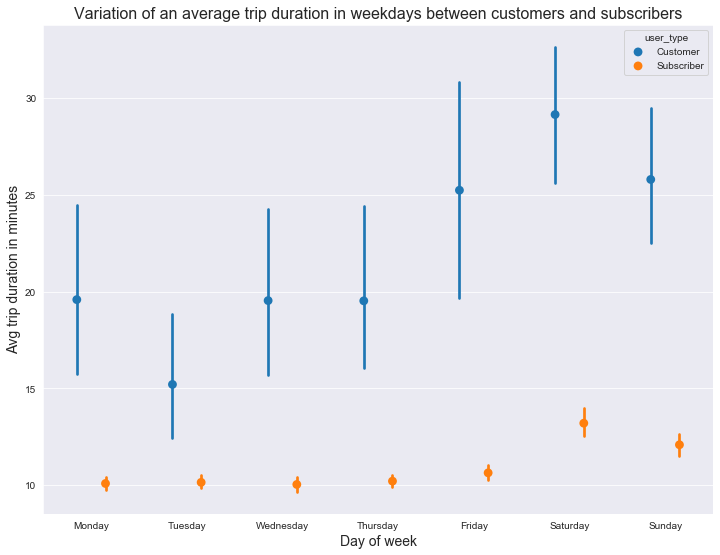

In [109]:
sb.pointplot(data=trip_master, x='start_day_of_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="")
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Avg trip duration in minutes', fontsize=14)
plt.title("Variation of an average trip duration in weekdays between customers and subscribers", fontsize=16);

Trip duration for customers is larger than for subscribers. Also, it is clear that subscribers spend less time in a trip than customers. Both of the user types have an increasing trend for the average time for a trip by the end of a week.

**Q2: How does the average trip duration vary during a week between different access methods?**

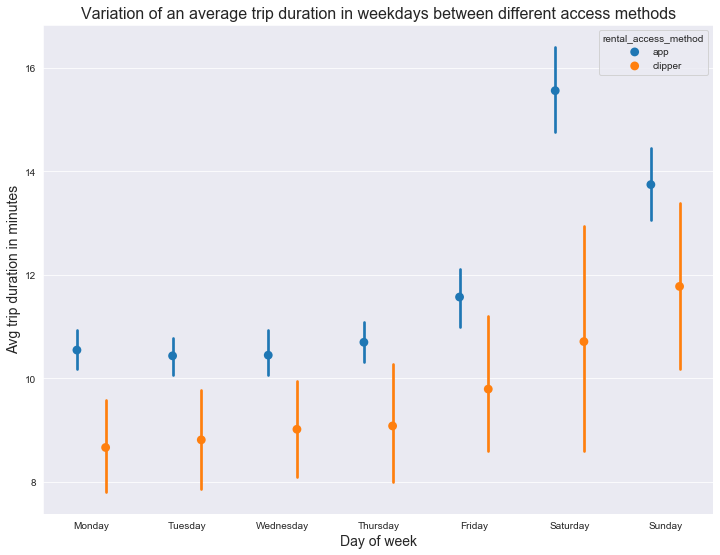

In [110]:
# Visualization
sb.pointplot(data=trip_master, x='start_day_of_week', y='duration_min', hue='rental_access_method', dodge=0.3, linestyles="")
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Avg trip duration in minutes', fontsize=14)
plt.title("Variation of an average trip duration in weekdays between different access methods", fontsize=16);

Overall, users accessed by the app tend to spend more time in a trip. Also, it is clear that the trend for both accessing methods is increasing by the end of a week.

**Q3: How does the hourly usage vary during a week for customers and subscribers?**

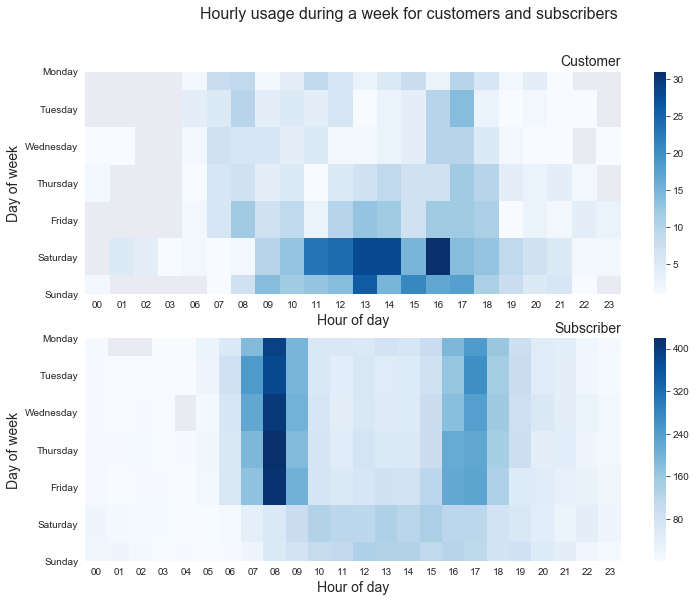

In [107]:
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

plt.subplot(2, 1, 1)
customers = trip_master.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = trip_master.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

It is interesting, that customers tend to use the bike service mostly on Saturday from 11 AM to 4 PM, while subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 4 PM - 6 PM).

**Q4: How does the hourly usage vary during a week for app and cleaper access methods?**

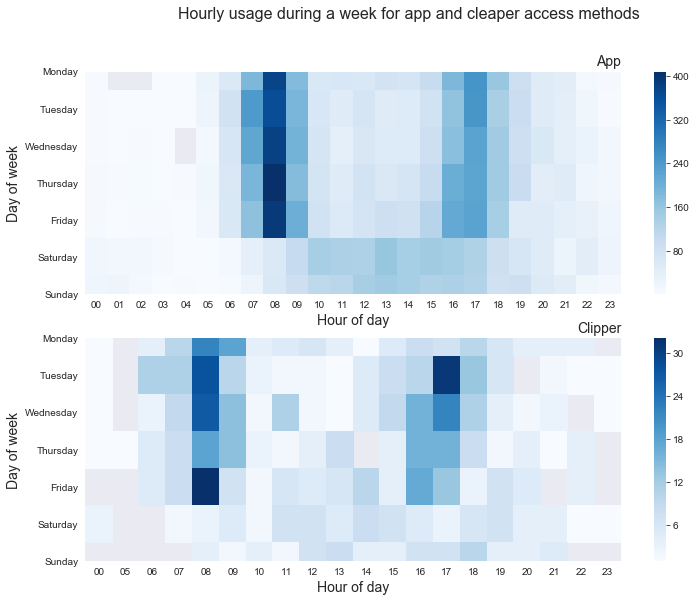

In [108]:
plt.suptitle('Hourly usage during a week for app and cleaper access methods', fontsize=16)

plt.subplot(2, 1, 1)
customers = trip_master.query('rental_access_method == "app"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('App', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = trip_master.query('rental_access_method == "clipper"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Clipper', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

The access method does not have a significant influence on a day and time of usage the service.

<a id='conclusion'></a>
## Conclusion 

I tried to explore the trip data of Bay Wheels's bike sharing service and tried to answer appeared research questions using Python's visualization tools. 

**Research questions and answers to them**:

**Q1: How does the average trip duration vary during a week between customers and subscribers?**

Trip duration for customers is larger than for subscribers. Also, it is clear that subscribers spend less time in a trip than customers. Both of the user types have an increasing trend for the average time for a trip by the end of a week.

**Q2: How does the average trip duration vary during a week between different access methods?**

Overall, users accessed by the app tend to spend more time in a trip. Also, it is clear that the trend for both accessing methods is increasing by the end of a week.

**Q3: How does the hourly usage vary during a week for customers and subscribers?**

It is interesting, that customers tend to use the bike service mostly on Saturdays from 11 AM to 4 PM, while subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 4 PM - 6 PM).

**Q4: How does the hourly usage vary during a week for app and cleaper access methods?**

The access method does not have a significant influence on a day and time of usage the service. However, if we get more data on clipper access method, the pattern may change. As it was shown before, there is a lack of data on clipper usage type, which can be associated with some technical specifications/conditions of the service.

From the bivariate and univariate data exploration I found the following interesting facts about the service:
* People tend to ride a bike less than an hour
* About 50% of trips have a duration between 6 to 14 mins.